# Reading data functions

In [ ]:
import pandas as pd

# function to read data from its predefined path
def read_data(path):
  try:
    return pd.read_csv(path)
  except:
    return pd.read_excel(path)

In [ ]:
import glob

# get all files for a certain path
def getallfiles(path):
  return glob.glob(path+'/*')

# Dataset 1: Retail Data Analysis

In [ ]:
!unzip '/content/Retail Data Analysis.zip'

Archive:  /content/Retail Data Analysis.zip
   creating: Retail Data Analysis/
  inflating: Retail Data Analysis/Features data set.csv  
  inflating: Retail Data Analysis/sales data-set.csv  
  inflating: Retail Data Analysis/stores data-set.csv  


In [ ]:
# print all CSVs.
data_files = getallfiles('/content/Retail Data Analysis')
for data_file in data_files:
  print(read_data(data_file))

    Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43  

# 1. Data merge and Preprocessing 

In [ ]:
# Read the 3 CSVs seperately and save them
df1 = read_data(data_files[2])
df2 = read_data(data_files[1])
df3 = read_data(data_files[0])

In [ ]:
# Set data dates to datetime format.
df1["Date"] = pd.to_datetime(df1["Date"])
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
df2["Date"] = pd.to_datetime(df2["Date"])
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
# mergine the two dataframes on Store number and the Date
merged_df = pd.merge(left=df1, right=df2, left_on=['Store','Date'], right_on=['Store','Date'])
merged_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,False


In [ ]:
# Sorting data frame by date from old to newest.
df = merged_df.sort_values(by="Date", ascending=True)
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
120124,13,2010-01-10,68.74,2.853,NaN,NaN,NaN,NaN,NaN,126.234600,7.795,False,14,20922.18,False
373364,40,2010-01-10,62.01,2.717,NaN,NaN,NaN,NaN,NaN,132.756800,5.287,False,74,9872.41,False
373365,40,2010-01-10,62.01,2.717,NaN,NaN,NaN,NaN,NaN,132.756800,5.287,False,79,10840.77,False
259245,27,2010-01-10,70.19,2.840,NaN,NaN,NaN,NaN,NaN,136.629757,8.021,False,98,9837.86,False
259244,27,2010-01-10,70.19,2.840,NaN,NaN,NaN,NaN,NaN,136.629757,8.021,False,97,19095.76,False


## Handling missing values

In [ ]:
len(set(df.Store))

45

In [ ]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
count,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2
top,NaN,2011-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False
freq,NaN,3027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391909,NaN,NaN,391909
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,NaN,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,NaN,44.260317,15981.258123,NaN
std,12.785297,NaN,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,NaN,30.492054,22711.183519,NaN
min,1.000000,NaN,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,NaN,1.000000,-4988.940000,NaN
25%,11.000000,NaN,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,NaN,18.000000,2079.650000,NaN


In [ ]:
# Filling missing values by mean values of each column
df['Temperature'].fillna(value=df['Temperature'].mean(), inplace=True)
df['MarkDown1'].fillna(value=df['MarkDown1'].mean(), inplace=True)
df['MarkDown2'].fillna(value=df['MarkDown2'].mean(), inplace=True)
df['MarkDown3'].fillna(value=df['MarkDown3'].mean(), inplace=True)
df['MarkDown4'].fillna(value=df['MarkDown4'].mean(), inplace=True)
df['MarkDown5'].fillna(value=df['MarkDown5'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 120124 to 380761
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     421570 non-null  float64       
 5   MarkDown2     421570 non-null  float64       
 6   MarkDown3     421570 non-null  float64       
 7   MarkDown4     421570 non-null  float64       
 8   MarkDown5     421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday_x   421570 non-null  bool          
 12  Dept          421570 non-null  int64         
 13  Weekly_Sales  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
dtypes: bool(2), 

# 2. EDA - Exploratory Data Analysis

## Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


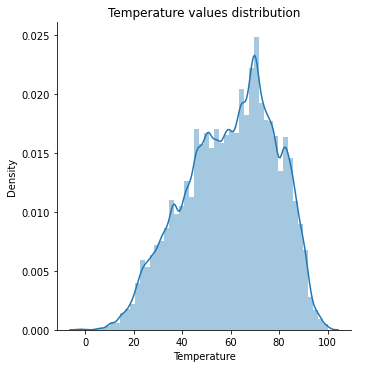

In [ ]:
import seaborn as sns

# Plotting distribution
ax = sns.FacetGrid(df,size=5).map(sns.distplot,"Temperature").add_legend()
ax.set(title='Temperature values distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


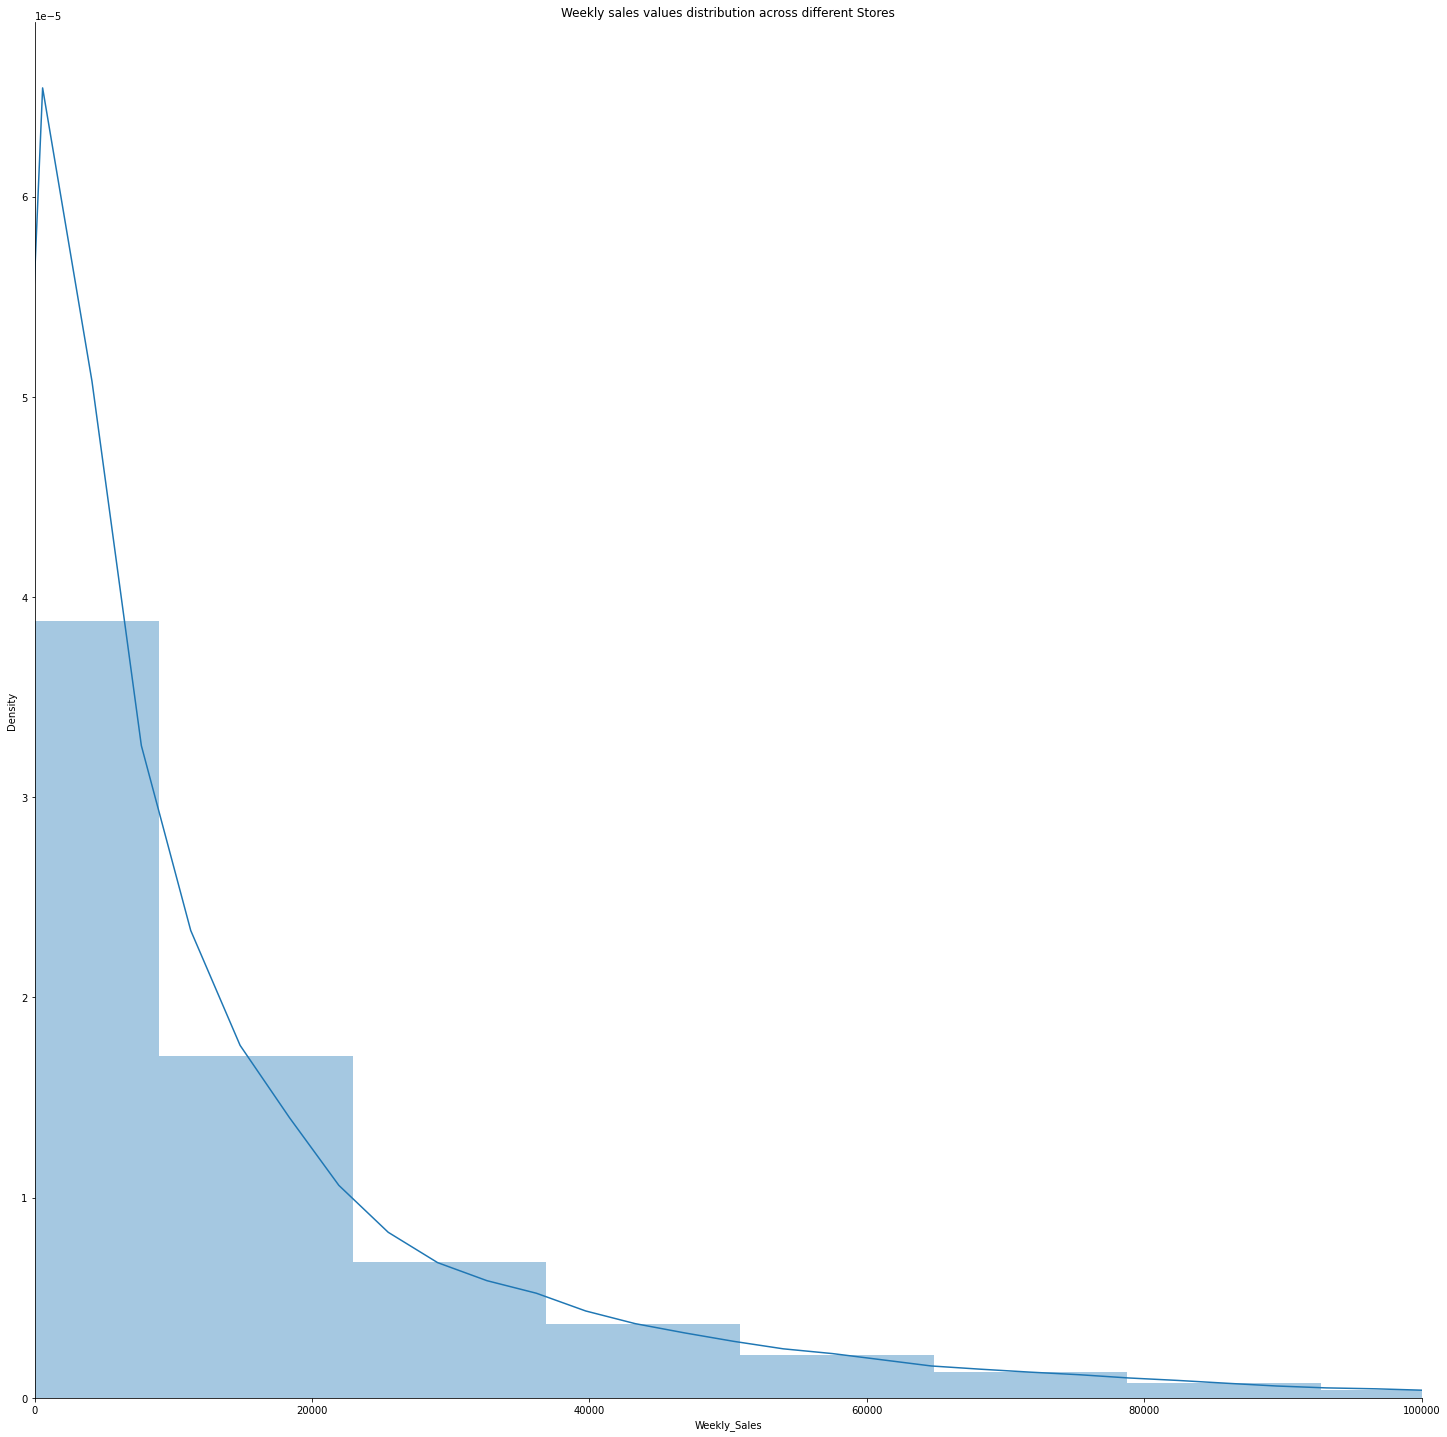

In [ ]:
ax = sns.FacetGrid(df,height=20).map(sns.distplot,"Weekly_Sales").add_legend()
ax.set(title='Weekly sales values distribution across different Stores',xlim=[0,100000])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


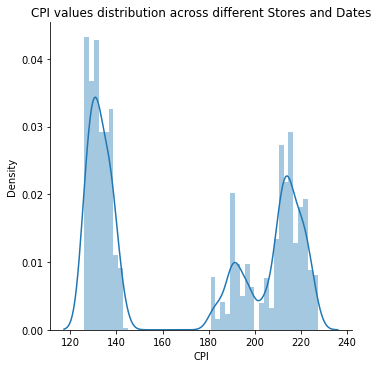

In [ ]:
ax = sns.FacetGrid(df,size=5).map(sns.distplot,"CPI").add_legend()
ax.set(title='CPI values distribution across different Stores and Dates')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


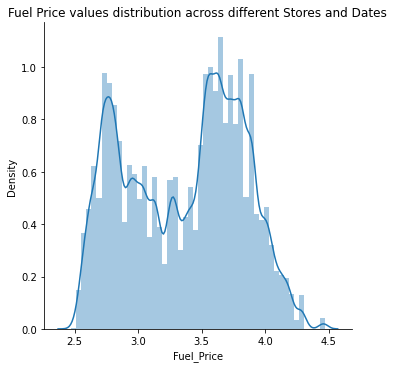

In [ ]:
ax = sns.FacetGrid(df,size=5).map(sns.distplot,"Fuel_Price").add_legend()
ax.set(title='Fuel Price values distribution across different Stores and Dates')

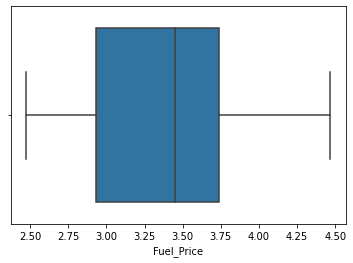

In [ ]:
# Boxplot data and see data mean and range of values.
sns.boxplot(x="Fuel_Price",data=df)
ax.set(title='Fuel Price values boxplot for range and mean representation across different Stores and Dates')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


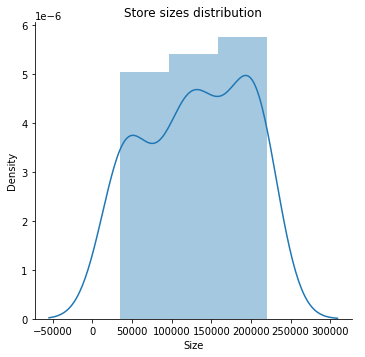

In [ ]:
ax = sns.FacetGrid(df3,size=5).map(sns.distplot,"Size").add_legend()
ax.set(title='Store sizes distribution')

## Bivariate Analysis

Text(0, 0.5, 'price')

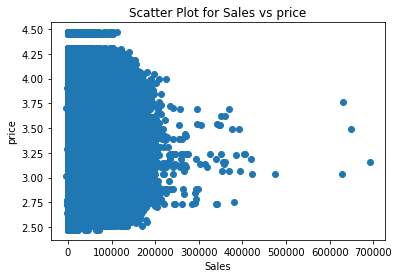

In [ ]:
import matplotlib.pyplot as plt

# plot the relationship between “sales” and ”price”
plt.scatter(df["Weekly_Sales"], df["Fuel_Price"])
plt.title("Scatter Plot for Sales vs price")
plt.xlabel("Sales")
plt.ylabel("price")

Text(0, 0.5, 'price')

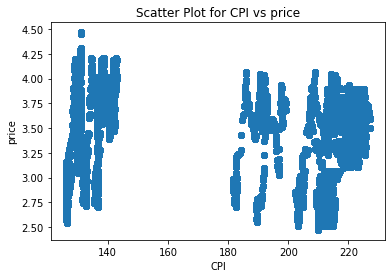

In [ ]:
# plot the relationship between “sales” and ”price”
plt.scatter(df["CPI"], df["Fuel_Price"])
plt.title("Scatter Plot for CPI vs price")
plt.xlabel("CPI")
plt.ylabel("price")

Text(0, 0.5, 'CPI')

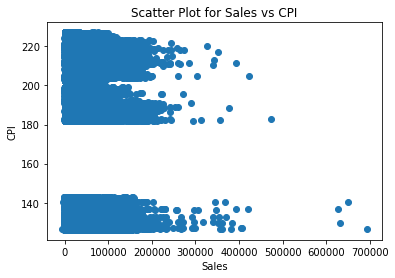

In [ ]:
# plot the relationship between “sales” and ”price”
plt.scatter(df["Weekly_Sales"], df["CPI"])
plt.title("Scatter Plot for Sales vs CPI")
plt.xlabel("Sales")
plt.ylabel("CPI")

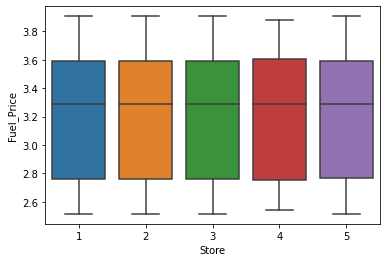

In [ ]:
# See the boxplot for only 5 stores in order to easily notice differences.
df_Store5 = df.query("Store in (1,2,3,4,5)")

sns.boxplot(y="Fuel_Price",x="Store",data=df_Store5)
plt.show()

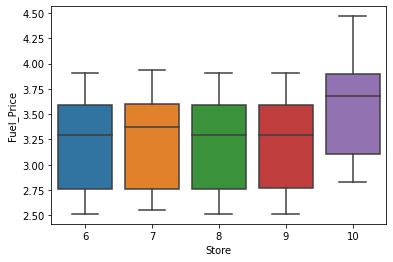

In [ ]:
df_Store5 = df.query("Store in (6,7,8,9,10)")

sns.boxplot(y="Fuel_Price",x="Store",data=df_Store5)
plt.show()

### Multivariate Analysis

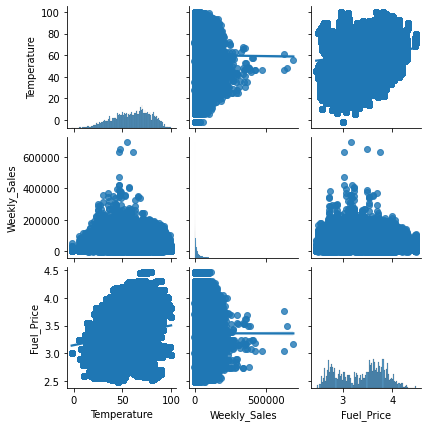

In [ ]:
# pair plot with plot type regression

sns.pairplot(df,height=2, vars = ['Temperature','Weekly_Sales', 'Fuel_Price'],  kind="reg")
plt.show()

In [ ]:
# Correlation between columns
correlation = df.corr(method='pearson')
correlation

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
Store,1.000000,-0.050097,0.065290,-0.071460,-0.017445,-0.017935,-0.005343,-0.015976,-0.211088,0.208552,-0.000548,0.024004,-0.085195,-0.000548
Temperature,-0.050097,1.000000,0.143859,-0.023189,-0.162835,-0.052169,-0.034571,-0.010056,0.182112,0.096730,-0.155949,0.004437,-0.002312,-0.155949
Fuel_Price,0.065290,0.143859,1.000000,0.023104,-0.070184,-0.036553,-0.015774,-0.048429,-0.164210,-0.033853,-0.078281,0.003572,-0.000120,-0.078281
MarkDown1,-0.071460,-0.023189,0.023104,1.000000,0.022747,-0.105646,0.785341,0.160079,-0.034201,0.027864,-0.022472,-0.001456,0.052208,-0.022472
MarkDown2,-0.017445,-0.162835,-0.070184,0.022747,1.000000,-0.047662,-0.006580,-0.007010,-0.020744,0.009924,0.198468,0.000148,0.013121,0.198468
MarkDown3,-0.017935,-0.052169,-0.036553,-0.105646,-0.047662,1.000000,-0.069613,-0.024990,-0.013788,0.006771,0.264071,0.001017,0.036018,0.264071
MarkDown4,-0.005343,-0.034571,-0.015774,0.785341,-0.006580,-0.069613,1.000000,0.105392,-0.028592,0.013013,-0.000340,0.002385,0.026984,-0.000340
MarkDown5,-0.015976,-0.010056,-0.048429,0.160079,-0.007010,-0.024990,0.105392,1.000000,0.037437,-0.002130,-0.033993,0.000065,0.055405,-0.033993
CPI,-0.211088,0.182112,-0.164210,-0.034201,-0.020744,-0.013788,-0.028592,0.037437,1.000000,-0.299953,-0.001944,-0.007477,-0.020921,-0.001944
Unemployment,0.208552,0.096730,-0.033853,0.027864,0.009924,0.006771,0.013013,-0.002130,-0.299953,1.000000,0.010460,0.007837,-0.025864,0.010460


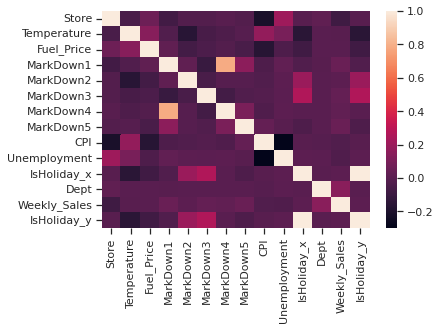

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

# Dataset 2: Police Shooting data

In [3]:
df_police = pd.read_csv('/content/fatal-police-shootings-data.csv')

In [ ]:
df_police

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


# 1. Data merge and Preprocessing 

In [4]:
df_police["date"] = pd.to_datetime(df_police["date"])
df_police

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [5]:
# Sorting data frame by date from old to new
df = df_police.sort_values(by="date", ascending=True)
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


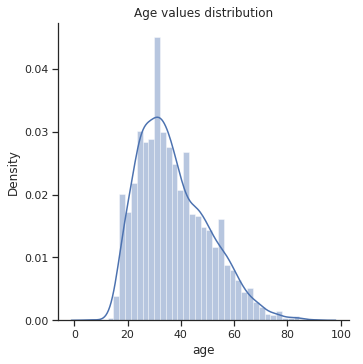

In [ ]:
# Plot the only distribution in 'age' column
ax = sns.FacetGrid(df,size=5).map(sns.distplot,"age").add_legend()
ax.set(title='Age values distribution')

In [6]:
# Correlation between columns
correlation = df.corr(method='pearson')
correlation

,id,age,signs_of_mental_illness,body_camera
id,1.000000,0.039159,-0.084858,0.019280
age,0.039159,1.000000,0.105763,-0.040138
signs_of_mental_illness,-0.084858,0.105763,1.000000,0.051838
body_camera,0.019280,-0.040138,0.051838,1.000000


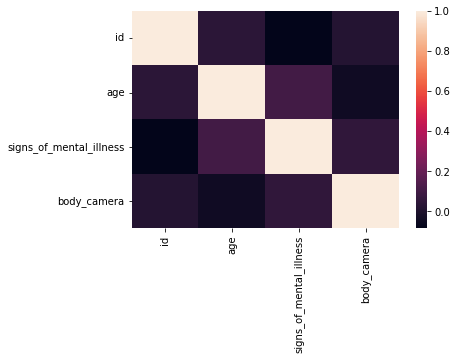

In [7]:
import seaborn as sns
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

As it's clear the age is the only column that has continous values so no room for so many plots here, and correlation between columns don't seem to be so strong